# Modelo no supervisado

In [6]:
## Importar librerias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df = df[["Latitude","Longitude","MedInc"]]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, train_size=0.8, random_state=42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


## Búsqueda del número de clusters 

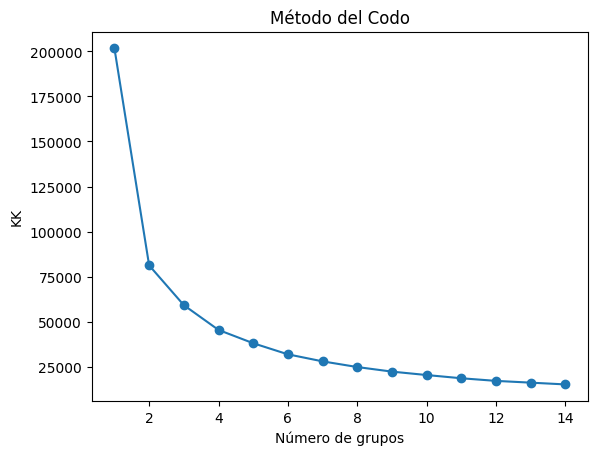

In [13]:
### Busqueda de El K
import matplotlib.pyplot as plt

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

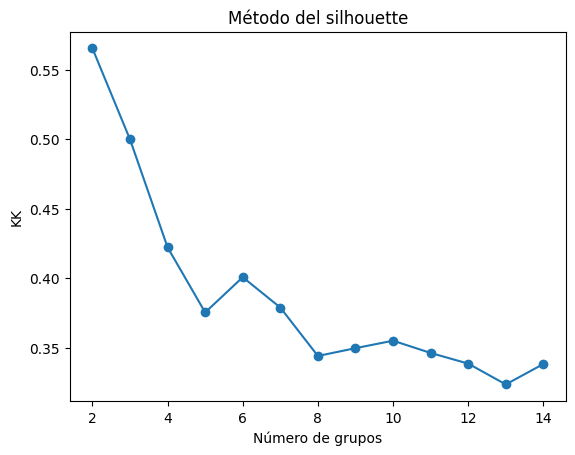

In [16]:
### Importar libreria
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)

    predict = kmeans.predict(X_train)
    silhouette_avg = metrics.silhouette_score(X_train, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método del silhouette')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

## Desarrollo del modelo K-means

In [17]:
ideal_model = KMeans(n_clusters=6, n_init='auto', random_state=42)
ideal_model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [18]:
ideal_model.cluster_centers_[:, 0]

array([37.68747253, 33.88940929, 33.84943618, 34.04157015, 35.87817073,
       38.14364263])

In [ ]:
## Determinar y_train
y_train = list(ideal_model.labels_)

## Agregar el cluster correspondiente a cada conjunto de datos
X_train["Cluster"] = y_train
X_train.head()

,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


In [22]:
## Cantidad de registros por clusters

X_train.Cluster.value_counts()

Cluster
3    4368
5    4356
1    3807
0    2455
2    1280
4     246
Name: count, dtype: int64

In [23]:
X_train.Cluster.value_counts(normalize=True)

Cluster
3    0.264535
5    0.263808
1    0.230560
0    0.148680
2    0.077519
4    0.014898
Name: proportion, dtype: float64

In [25]:
## Promedio de ingresos por cluster

X_train.groupby("Cluster")["MedInc"].mean()

Cluster
0     5.380158
1     4.348026
2     6.939476
3     2.428376
4    11.748734
5     2.740572
Name: MedInc, dtype: float64

In [26]:
X_train.groupby("Cluster")["MedInc"].std()

Cluster
0    1.124744
1    0.631529
2    1.110431
3    0.622707
4    1.908435
5    0.781223
Name: MedInc, dtype: float64

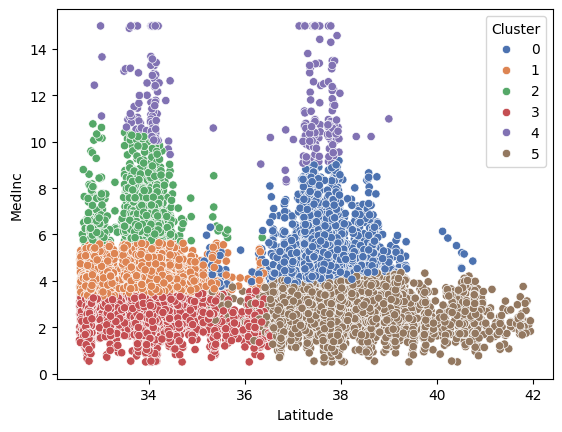

In [37]:
import seaborn as sns

sns.scatterplot(data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.show()

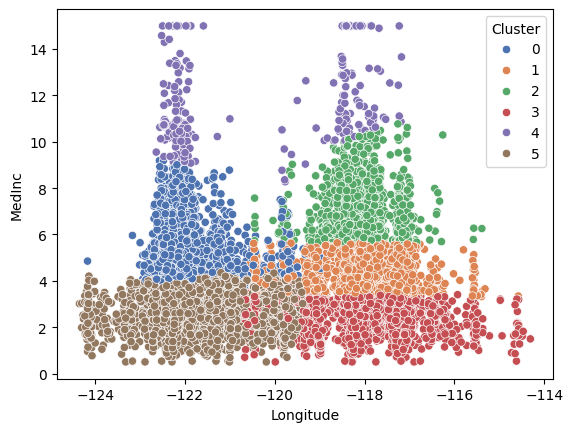

In [38]:
sns.scatterplot(data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.show()

## Predicción

In [30]:
y_test = ideal_model.predict(X_test)
X_test['Cluster'] = y_test

In [31]:
X_test.head()

,Latitude,Longitude,MedInc,Cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


In [50]:
from pickle import dump

dump(ideal_model, open("../models/k-means_default_42.sav", "wb"))

# Modelo Supervisado

In [42]:
X_train = X_train.drop('Cluster', axis=1)
X_train

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542
...,...,...,...
11284,33.78,-117.96,6.3700
11964,34.02,-117.43,3.0500
5390,34.03,-118.38,2.9344
860,37.58,-121.96,5.7192


In [43]:
## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
X_test = X_test.drop('Cluster', axis=1)
X_test

,Latitude,Longitude,MedInc
20046,36.06,-119.01,1.6812
3024,35.14,-119.46,2.5313
15663,37.80,-122.44,3.4801
20484,34.28,-118.72,5.7376
9814,36.62,-121.93,3.7250
...,...,...,...
15362,33.36,-117.22,4.6050
16623,35.36,-120.83,2.7266
18086,37.31,-122.05,9.2298
2144,36.77,-119.76,2.7850


In [46]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9956395348837209

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [52]:
dump(model, open("../models/random_forest_classifier_default_42.sav", "wb"))